# ちょっとしたアニメーションサンプル

<IPython.core.display.Javascript object>


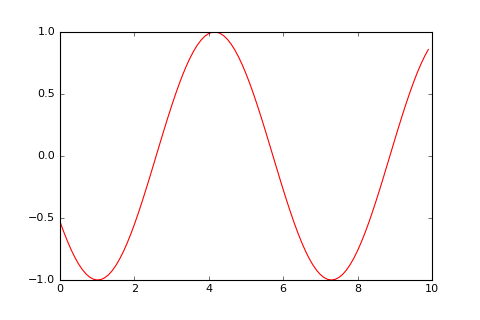

In [35]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
x = np.arange(0, 10, 0.1)

ims = []
for a in range(50):
    y = np.sin(x - a)
    im = plt.plot(x, y, "r")
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims)
plt.show()

# グラフ描画

IDLE など interactive shell で対話的にやる場合は pylab の方がいいらしい。

スクリプトに書くなら matplotlib.pyplot の方がいいらしい: こちらは後でやる。

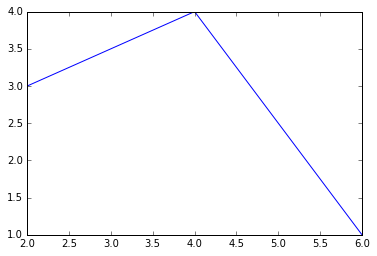

In [6]:
%matplotlib inline
from pylab import plot, show

x_numbers = [2, 4, 6]
y_numbers = [3, 4, 1]

plot(x_numbers, y_numbers)
show()

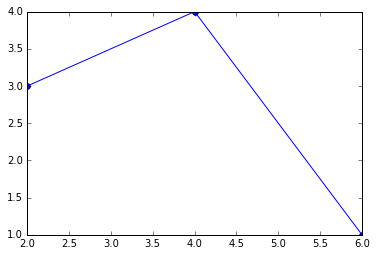

In [7]:
# プロットしたところを強調するマーカーをつけてくれる
plot(x_numbers, y_numbers, marker='o') # marker は 'o', '*', 'x', +' から選べる

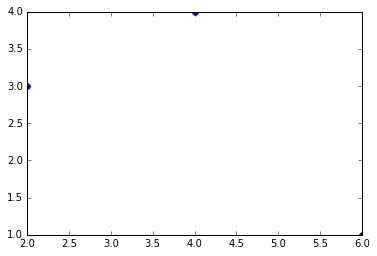

In [8]:
# marker を省くとプロットだけになる
plot(x_numbers, y_numbers, 'o')

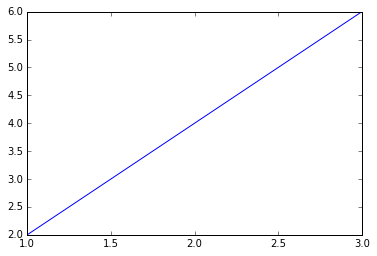

In [9]:
# 直線を引いてみる
x_numbers = [1, 2, 3]
y_numbers = [2, 4, 6]

plot(x_numbers, y_numbers)

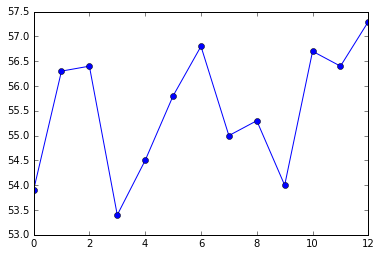

In [14]:
# 適当な折れ線を引く
lst = [53.9, 56.3, 56.4, 53.4, 54.5, 55.8, 56.8, 55.0, 55.3, 54.0, 56.7, 56.4, 57.3]
plot(lst, marker='o')

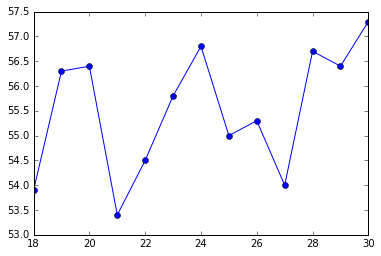

In [15]:
# 横軸を適当に設定
num = 18
h_axis = range(num, num + len(lst))
plot(h_axis, lst, marker='o')

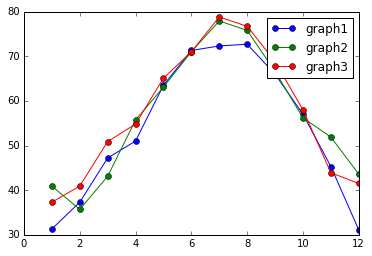

In [22]:
# 複数のグラフを同時に載せる
from pylab import legend

h_axis_multiple = range(1, 13)
lst1 = [31.3, 37.3, 47.2, 51.0, 63.5, 71.3, 72.3, 72.7, 66.0, 57.0, 45.3, 31.1]
lst2 = [40.9, 35.7, 43.1, 55.7, 63.1, 71.0, 77.9, 75.8, 66.6, 56.2, 51.9, 43.6]
lst3 = [37.3, 40.9, 50.9, 54.8, 65.1, 71.0, 78.8, 76.7, 68.8, 58.0, 43.9, 41.5]

plot(h_axis_multiple, lst1, h_axis_multiple, lst2, h_axis_multiple, lst3, marker='o')

# 凡例を追加: legend は plot の下に書かないといけない模様
legend(['graph1', 'graph2', 'graph3'])

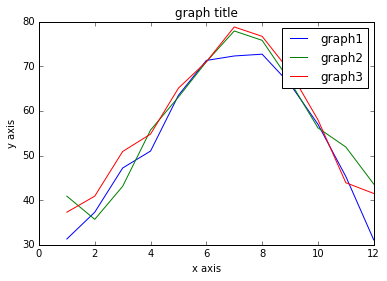

In [24]:
# グラフに色々追加
from pylab import plot, show, title, xlabel, ylabel, legend
plot(h_axis_multiple, lst1, h_axis_multiple, lst2, h_axis_multiple, lst3)

title('graph title')
xlabel('x axis')
ylabel('y axis')
legend(['graph1', 'graph2', 'graph3'])

(-1.0, 13.0, 50.0, 60)

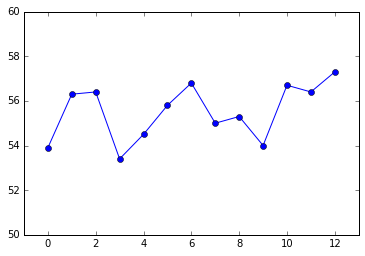

In [29]:
# 軸の表示を変える
from pylab import axis

lst = [53.9, 56.3, 56.4, 53.4, 54.5, 55.8, 56.8, 55.0, 55.3, 54.0, 56.7, 56.4, 57.3]
plot(lst, marker='o')
axis(xmin=-1)
axis(xmax=13)
axis(ymin=50)
axis(ymax=60)
# axis([xmin, xmax, ymin, ymax]) のように一括指定もできる

## pyplot

<IPython.core.display.Javascript object>


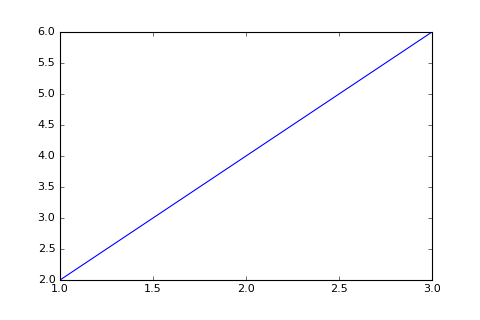

In [39]:
import matplotlib.pyplot as plt
x_numbers = [1, 2, 3]
y_numbers = [2, 4, 6]
plt.plot(x_numbers, y_numbers)
plt.show()

# ファイルとして保存できる
plt.savefig('./fig1.png')
plt.savefig('./fig1.svg')
plt.savefig('./fig1.pdf')

## 式をもとにグラフを描く

In [ ]:
import matplotlib.pyplot as plt

# 距離の変動範囲
r = range(100, 1001, 20)
# 重力定数
G = 6.674*(10**-11)
# 質量
m1 = 0.5
m2 = 1.5
# 重力
F = [G * (m1 * m2) / (dist ** 2) for dist in r]

plt.plot(r, F, marker='o')
# Jupyter 上日本語が文字化けするようなので英語で書いた
plt.xlabel('Distance')
plt.ylabel('Newton gravitational force')
plt.title('A graph for the inverse square law')
plt.show()

## 物体の投射 (放物線)

初期速度 (m/s): 45
投射角度 (ラジアンでなく度数法で): 45


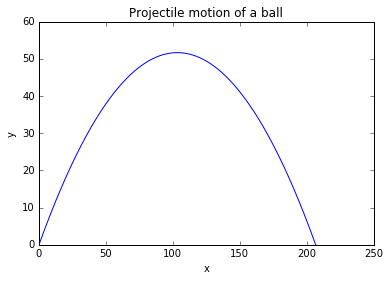

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

def frange(start, final, interval):
    numbers = []
    # float だと range が使えないのでこの処理
    while start < final:
        numbers.append(start)
        start = start + interval

    return numbers

def get_trajectory(v0, theta):
    # 重力定数の定義
    g = 9.8
    
    # 入力の角度をラジアンに変換
    theta = math.radians(theta)
    
    # 着地までの時間の計算
    t_flight = 2 * v0 * math.sin(theta) / g
    
    # 着地時間までの時間リスト: dt 刻み
    dt = 0.001
    intervals = frange(0, t_flight, dt)

    # x, y 座標の計算
    x = []
    y = []
    for t in intervals:
        x.append(v0*math.cos(theta)*t)
        y.append(v0*math.sin(theta)*t - 0.5*g*t*t)

    return (x,y)

try:
    v0 = float(input('初期速度 (m/s): '))
    theta = float(input('投射角度 (ラジアンでなく度数法で): '))
except ValueError:
    print('入力値が不正')
else:
    tragectory = get_trajectory(v0, theta)

    plt.plot(tragectory[0], tragectory[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Projectile motion of a ball')
    plt.show()

## 複数の放物線を重ねる

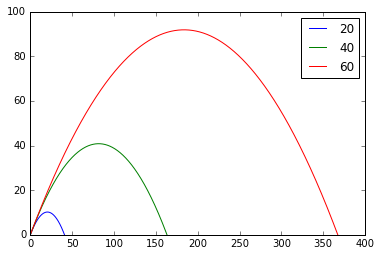

In [67]:
# List of three different initial velocities
v0_list = [20, 40, 60]
theta = 45
tragectories = []

for v0 in v0_list:
    tragectories.append(get_trajectory(v0, theta))

# Add a legend and show the graph
plt.plot(tragectories[0][0], tragectories[0][1],
         tragectories[1][0], tragectories[1][1],
         tragectories[2][0], tragectories[2][1])
plt.legend(['20', '40', '60'])
plt.show()